# Latar Belakang

Didapatkan database mengenai seluruh trip taxi new york dalam rentang waktu tertentu. Saat ini perusahaan sedang ingin menganalisis apakah fare yang diberikan saat ini bisa ditingkatkan sehingga membuat perusahaan lebih profit

## Pernyataan Masalah

Dari dataset yang diberikan bisa dilihat dan dianalisis untuk mencari dibagian mana kita bisa meningkatkan fare supaya perusahaan lebih profit

# Data Introduction

## Import library yang dibutuhkan

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, pearsonr, shapiro
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [57]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


# Data Understanding and Cleaning

In [58]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [59]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [60]:
# Create a list to store the summary information
summary_data = []

# Iterate through each column in the DataFrame
for column in df.columns:
    # Count the number of unique values in the column
    num_unique = df[column].nunique()
    # Get a sample of unique values from the column
    unique_sample = df[column].drop_duplicates().sample(min(5, num_unique)).tolist()
    # Append the summary information to the list
    summary_data.append({'Column Name': column, 'Number of Unique': num_unique, 'Unique Sample': unique_sample})

# Create a DataFrame from the summary data list
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
print(summary_df)

              Column Name  Number of Unique  \
0                VendorID                 2   
1    lpep_pickup_datetime             66575   
2   lpep_dropoff_datetime             66519   
3      store_and_fwd_flag                 2   
4              RatecodeID                 6   
5            PULocationID               226   
6            DOLocationID               249   
7         passenger_count                10   
8           trip_distance              1870   
9             fare_amount              2553   
10                  extra                16   
11                mta_tax                 6   
12             tip_amount              1492   
13           tolls_amount                26   
14              ehail_fee                 0   
15  improvement_surcharge                 5   
16           total_amount              4670   
17           payment_type                 5   
18              trip_type                 2   
19   congestion_surcharge                 4   

            

### Missing Value

In [61]:
# Check for NaN values in each column
columns_with_nan = df.columns[df.isna().any()].tolist()

# Display the columns with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge']


In [62]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

<Axes: >

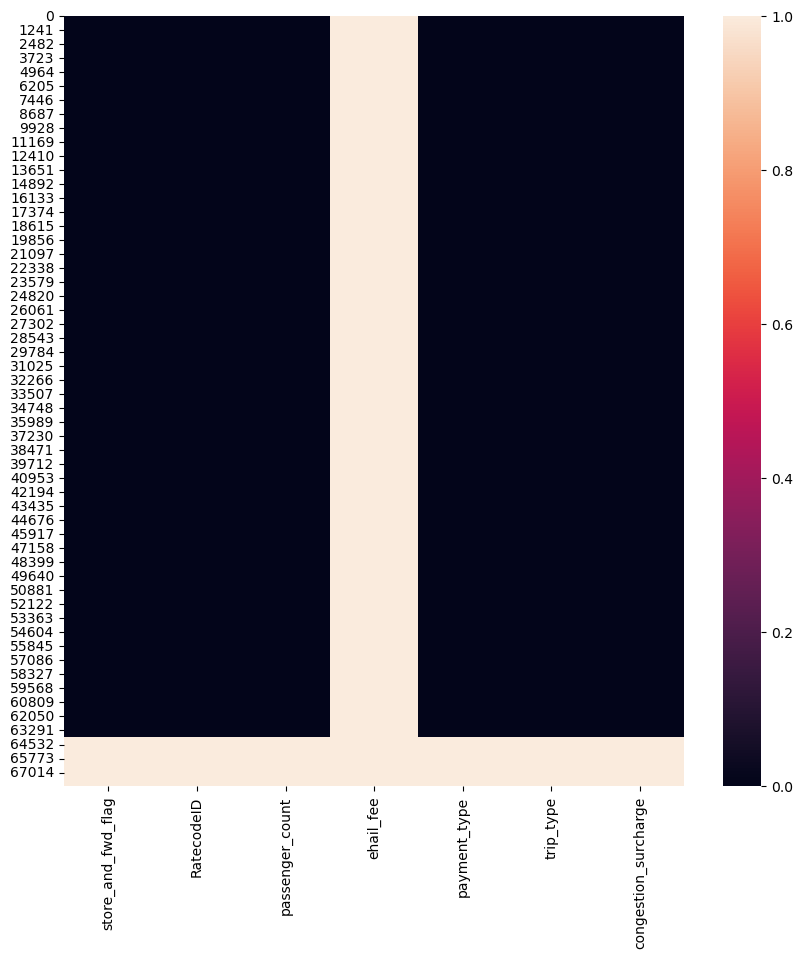

In [63]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())

In [64]:
df.drop(columns=['ehail_fee'], inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [65]:
df.dropna(subset=['store_and_fwd_flag'], inplace=True)

In [66]:
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.000000
trip_type                0.015653
congestion_surcharge     0.000000
dtype: float64

In [67]:
df.dropna(subset=['trip_type'], inplace=True)
df.isna().sum()/df.shape[0]*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

In [68]:
df[(df['fare_amount'] < 0)].sort_values('total_amount')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
14259,2,2023-01-08 12:34:20,2023-01-08 12:35:59,N,2.0,82,129,1.0,0.14,-70.0,0.0,-0.5,0.0,0.0,-1.0,-71.5,3.0,1.0,0.0
17233,2,2023-01-09 21:30:13,2023-01-09 21:30:50,N,2.0,95,95,1.0,0.00,-70.0,0.0,-0.5,0.0,0.0,-1.0,-71.5,3.0,1.0,0.0
11789,2,2023-01-07 04:01:10,2023-01-07 04:02:35,N,5.0,7,7,1.0,0.00,-60.0,0.0,0.0,0.0,0.0,-1.0,-61.0,3.0,2.0,0.0
35092,2,2023-01-18 16:20:18,2023-01-18 16:24:58,N,5.0,131,131,1.0,0.00,-60.0,0.0,0.0,0.0,0.0,-1.0,-61.0,3.0,2.0,0.0
56212,2,2023-01-28 02:03:10,2023-01-28 02:03:14,N,5.0,179,179,1.0,0.00,-50.0,0.0,0.0,0.0,0.0,-1.0,-51.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55024,2,2023-01-27 15:25:46,2023-01-27 15:25:51,N,1.0,74,74,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
10016,2,2023-01-06 12:06:25,2023-01-06 12:06:59,N,1.0,42,42,2.0,0.08,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0
6865,2,2023-01-04 21:19:19,2023-01-04 21:19:23,N,1.0,193,193,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0


In [69]:
# Merubah semua data menjadi positif
for col in list(df.select_dtypes(include='number').columns):
    df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)

In [70]:
# Merubah jenis data untuk tanggal
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [71]:
df.lpep_pickup_datetime.describe()

count                            63877
mean     2023-01-16 20:29:28.932651776
min                2009-01-01 20:21:27
25%                2023-01-09 12:15:18
50%                2023-01-17 08:44:46
75%                2023-01-24 16:18:41
max                2023-02-01 03:10:05
Name: lpep_pickup_datetime, dtype: object

In [72]:
df['VendorID'] = df['VendorID'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')

In [73]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 63877 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63877 non-null  category      
 1   lpep_pickup_datetime   63877 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63877 non-null  datetime64[ns]
 3   store_and_fwd_flag     63877 non-null  category      
 4   RatecodeID             63877 non-null  category      
 5   PULocationID           63877 non-null  category      
 6   DOLocationID           63877 non-null  category      
 7   passenger_count        63877 non-null  float64       
 8   trip_distance          63877 non-null  float64       
 9   fare_amount            63877 non-null  float64       
 10  extra                  63877 non-null  float64       
 11  mta_tax                63877 non-null  float64       
 12  tip_amount             63877 non-null  float64       
 13  tolls_

In [74]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge
count,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.315920,2.576974,16.107727,0.885154,0.629534,2.041982,0.144182,0.954459,21.247460,1.021933,0.727120
min,2009-01-01 20:21:27,2009-01-02 11:07:31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,0.000000
50%,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,0.000000
75%,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,1.000000,2.750000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,2.000000,2.750000
std,NaN,NaN,0.979123,6.760261,13.236802,1.289661,0.362469,2.998411,1.012740,0.175153,15.065936,0.146465,1.212742


In [75]:
df['date'] = df['lpep_pickup_datetime'].dt.date
df['day'] = df['lpep_pickup_datetime'].dt.day
df['weekday'] = df['lpep_pickup_datetime'].dt.weekday
df['hr'] = df['lpep_pickup_datetime'].dt.hour

In [76]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['duration'] = df['duration'] / np.timedelta64(1, 'm')

In [77]:
df.duration.describe()

count    63877.000000
mean        17.973569
std         77.301793
min          0.000000
25%          7.083333
50%         11.100000
75%         16.883333
max       1439.883333
Name: duration, dtype: float64

In [78]:
# Hanya mengambil durasi lebih dari 0
df = df[df['duration'] > 0]

In [79]:
# Mengecek durasi yang lebih dari 3 jam
df[df['duration'] > 180].sort_values('duration', ascending=False)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,day,weekday,hr,duration
26403,2,2023-01-13 22:13:15,2023-01-14 22:13:08,N,1.0,193,7,1.0,0.00,0.0,...,0.0,0.00,1.0,1.0,0.00,2023-01-13,13,4,22,1439.883333
2130,2,2023-01-02 15:46:00,2023-01-03 15:45:15,N,1.0,193,193,1.0,0.00,0.0,...,0.0,0.00,1.0,1.0,0.00,2023-01-02,2,0,15,1439.250000
38200,2,2023-01-19 20:12:15,2023-01-20 20:11:25,N,1.0,193,193,1.0,0.00,0.0,...,0.0,0.00,1.0,1.0,0.00,2023-01-19,19,3,20,1439.166667
33850,2,2023-01-18 06:58:14,2023-01-19 06:57:10,N,1.0,74,41,1.0,1.09,7.9,...,1.0,9.40,1.0,1.0,0.00,2023-01-18,18,2,6,1438.933333
54199,2,2023-01-27 08:56:22,2023-01-28 08:55:17,N,1.0,43,239,1.0,1.89,11.4,...,1.0,19.56,1.0,1.0,2.75,2023-01-27,27,4,8,1438.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23872,2,2023-01-12 20:15:27,2023-01-13 00:00:00,N,1.0,82,258,1.0,3.32,18.4,...,1.0,20.90,2.0,1.0,0.00,2023-01-12,12,3,20,224.550000
6815,2,2023-01-04 20:16:20,2023-01-05 00:00:00,N,1.0,66,112,1.0,4.44,21.2,...,1.0,28.44,1.0,1.0,0.00,2023-01-04,4,2,20,223.666667
11315,2,2023-01-06 20:24:00,2023-01-07 00:00:00,N,1.0,260,255,1.0,4.82,23.3,...,1.0,27.09,1.0,1.0,0.00,2023-01-06,6,4,20,216.000000
1142,2,2023-01-01 20:28:01,2023-01-02 00:00:00,N,1.0,83,226,1.0,0.00,17.0,...,1.0,19.50,2.0,1.0,0.00,2023-01-01,1,6,20,211.983333


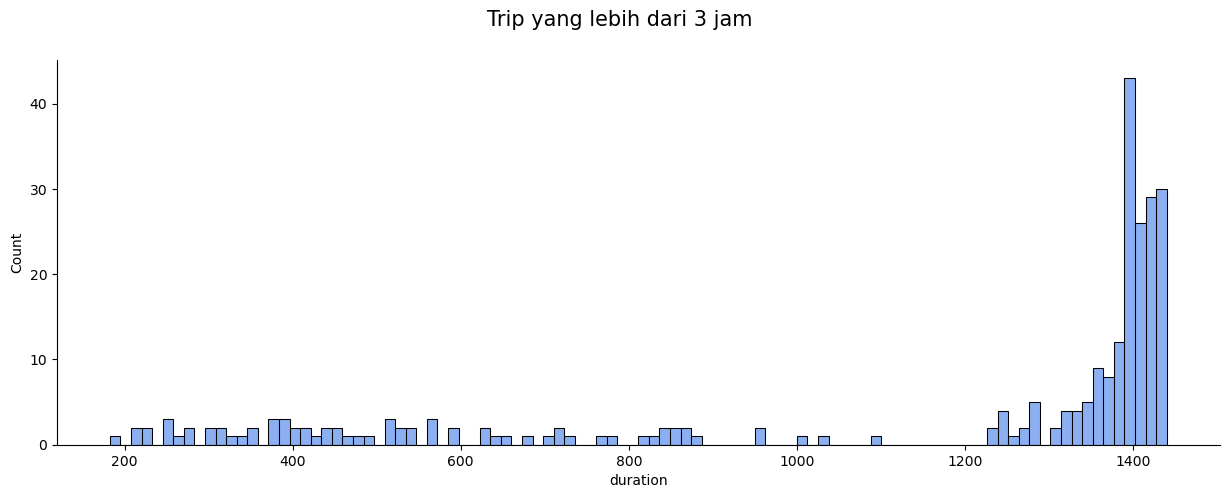

In [80]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(
    df[df['duration'] > 180].duration,
    bins=100,
    color='cornflowerblue'
)
fig.suptitle('Trip yang lebih dari 3 jam', fontsize=15)
sns.despine()
plt.show()

In [81]:
# Mengambil yang kurang dari 3 jam
df = df[df['duration'] < 200]

In [82]:
df.duration.describe()

count    63559.000000
mean        13.376782
std         10.136866
min          0.016667
25%          7.066667
50%         11.066667
75%         16.783333
max        182.533333
Name: duration, dtype: float64

In [83]:
df.passenger_count.value_counts()

passenger_count
1.0    53999
2.0     5080
5.0     1767
6.0     1054
3.0      953
4.0      363
0.0      335
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Ada beberapa trip yang memiliki 0 penumpang dan hal tersebut bisa dianggap mustahil. Daripada data tersebut saya drop, lebih baik menggunakan median untuk mengganti nilai tersebut

In [84]:
pas_median = df[df['passenger_count'] != 0].passenger_count.median()
df['passenger_count'] = df['passenger_count'].apply(lambda x: pas_median if x == 0 else x)
df.passenger_count.value_counts()

passenger_count
1.0    54334
2.0     5080
5.0     1767
6.0     1054
3.0      953
4.0      363
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Sebenarnya berdasarkan peraturan yang ada di US maksimum penumpang hanya 5. Akan tetapi jika penumpang tersebut masih di bawah umur maka tidak dihitung. Hal tersebut membuat saya membiarkan penumpang yang diatas 6

In [85]:
df.trip_distance.describe()

count    63559.000000
mean         2.573990
std          6.764461
min          0.000000
25%          1.100000
50%          1.800000
75%          3.050000
max       1571.970000
Name: trip_distance, dtype: float64

Ada trip yang memiliki jarak 0

In [86]:
df[df['trip_distance'] == 0].sort_values('duration', ascending=False)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,day,weekday,hr,duration
41874,2,2023-01-21 13:42:49,2023-01-21 15:59:50,N,5.0,219,264,1.0,0.0,18.0,...,0.0,18.00,1.0,2.0,0.0,2023-01-21,21,5,13,137.016667
50555,2,2023-01-25 15:34:11,2023-01-25 17:42:53,N,5.0,130,132,1.0,0.0,25.0,...,0.0,30.00,1.0,2.0,0.0,2023-01-25,25,2,15,128.700000
12681,2,2023-01-07 13:32:58,2023-01-07 15:39:17,N,5.0,65,66,1.0,0.0,15.0,...,0.0,15.01,1.0,2.0,0.0,2023-01-07,7,5,13,126.316667
39795,2,2023-01-20 14:21:23,2023-01-20 16:27:25,N,5.0,138,191,1.0,0.0,25.0,...,0.0,25.00,1.0,2.0,0.0,2023-01-20,20,4,14,126.033333
58548,2,2023-01-29 09:32:16,2023-01-29 11:31:14,N,1.0,7,193,1.0,0.0,0.0,...,0.0,0.00,1.0,1.0,0.0,2023-01-29,29,6,9,118.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37865,2,2023-01-19 18:46:57,2023-01-19 18:46:58,N,1.0,74,264,1.0,0.0,3.0,...,1.0,7.00,2.0,1.0,0.0,2023-01-19,19,3,18,0.016667
38140,1,2023-01-19 20:10:35,2023-01-19 20:10:36,N,1.0,97,97,1.0,0.0,20.5,...,1.0,22.00,1.0,1.0,0.0,2023-01-19,19,3,20,0.016667
24859,2,2023-01-13 12:22:52,2023-01-13 12:22:53,N,5.0,264,264,1.0,0.0,25.0,...,0.3,25.30,1.0,2.0,0.0,2023-01-13,13,4,12,0.016667
296,2,2023-01-01 06:04:55,2023-01-01 06:04:56,N,5.0,7,264,1.0,0.0,12.0,...,1.0,16.90,1.0,2.0,0.0,2023-01-01,1,6,6,0.016667


Dari sini bisa dilihat bahwa terdapat juga fare amount yang 0. Berdasarkan peraturan seharusnya minimal fare itu 3 dollar per penumpang masuk

In [87]:
df = df[df['fare_amount'] > 3]
df = df[df['trip_distance'] > 0]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,day,weekday,hr,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,24.18,1.0,1.0,2.75,2023-01-01,1,6,0,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,15.84,1.0,1.0,0.00,2023-01-01,1,6,0,6.766667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,10.20,1.0,1.0,0.00,2023-01-01,1,6,0,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,8.00,1.0,1.0,0.00,2023-01-01,1,6,0,5.966667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,1.0,22.95,2.0,1.0,2.75,2023-01-01,1,6,0,17.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.3,17.30,1.0,2.0,0.00,2023-01-31,31,1,23,7.983333
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,19.20,1.0,1.0,0.00,2023-01-31,31,1,23,10.750000
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,14.16,1.0,1.0,0.00,2023-01-31,31,1,23,6.016667
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,22.50,1.0,1.0,2.75,2023-01-31,31,1,23,9.533333


In [88]:
display(df.describe(), df.describe(include='object'))

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,day,weekday,hr,duration
count,60094,60094,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000,60094.000000
mean,2023-01-16 23:00:25.706726400,2023-01-16 23:13:46.654691072,1.330332,2.716317,15.944630,0.916477,0.617757,2.110138,0.130470,0.955763,21.205573,1.013828,0.762551,16.356575,2.842996,13.962242,13.349133
min,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,0.010000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,1.000000,0.000000,1.000000,0.000000,0.000000,0.016667
25%,2023-01-09 12:43:17.249999872,2023-01-09 12:55:21.249999872,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.880000,1.000000,0.000000,9.000000,1.000000,10.000000,7.283333
50%,2023-01-17 09:20:14,2023-01-17 09:36:12,1.000000,1.890000,12.800000,0.000000,0.500000,1.660000,0.000000,1.000000,17.500000,1.000000,0.000000,17.000000,3.000000,15.000000,11.150000
75%,2023-01-24 16:32:53.750000128,2023-01-24 16:48:06,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.380000,1.000000,2.750000,24.000000,4.000000,18.000000,16.666667
max,2023-02-01 03:10:05,2023-02-01 03:40:35,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,2.000000,2.750000,31.000000,6.000000,23.000000,182.533333
std,NaN,NaN,0.988742,6.924601,11.961505,1.304492,0.339784,2.938440,0.961734,0.171199,14.012270,0.116779,1.231012,8.772324,1.959781,5.179948,9.488029


,date
count,60094
unique,33
top,2023-01-25
freq,2371


# EDA

## Trip

Rata-rata trip setiap harinya

In [89]:
hours_df = df.groupby(['hr', 'date'], as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_trip'}, axis=1) \
    .groupby('hr', as_index=False)['total_trip'] \
        .agg({'total_trip' : 'mean'}) \
        .rename({'total_trip' : 'Rata-rata trip'}, axis=1)

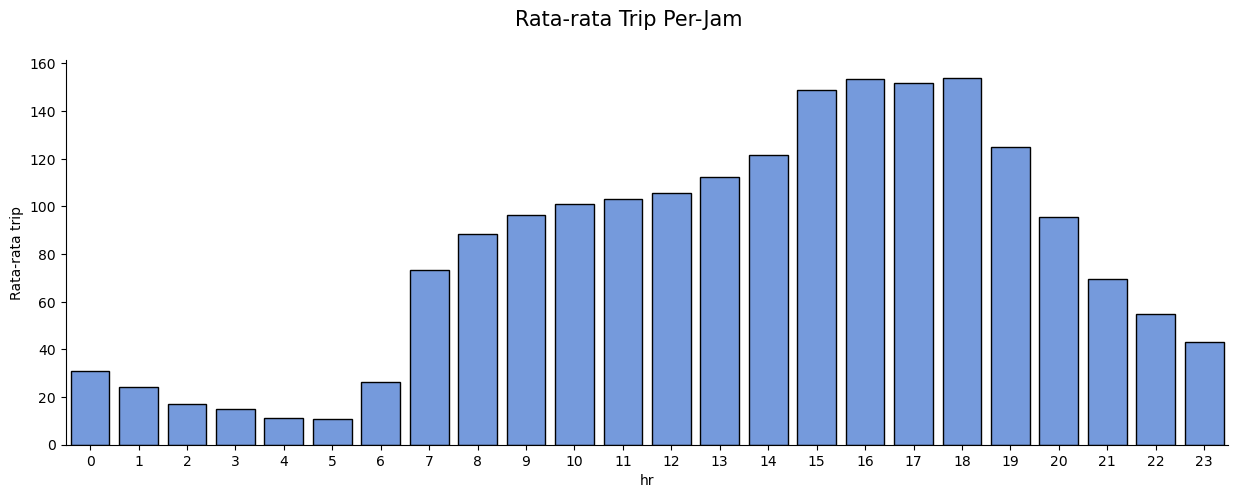

In [90]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=hours_df,
    x='hr',
    y='Rata-rata trip',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Rata-rata Trip Per-Jam', fontsize=15)
sns.despine()
plt.show()

Dapat dilihat bahwa biasanya trip paling banyak di pukul 4 sampai 6 sore dan paling sedikit pada 5 pagi

In [91]:
days_df = df.groupby('day', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_trip'}, axis=1)

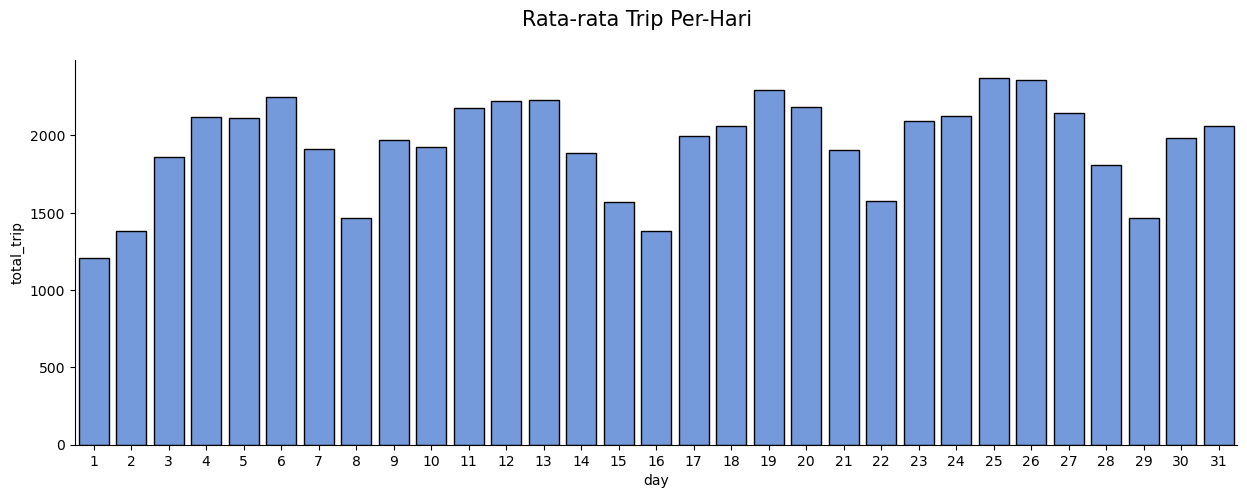

In [92]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=days_df,
    x='day',
    y='total_trip',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Rata-rata Trip Per-Hari', fontsize=15)
sns.despine()
plt.show()

In [93]:
hours = df.pivot_table(
    index='date',
    columns='hr',
    values='VendorID',
    aggfunc='count'
)

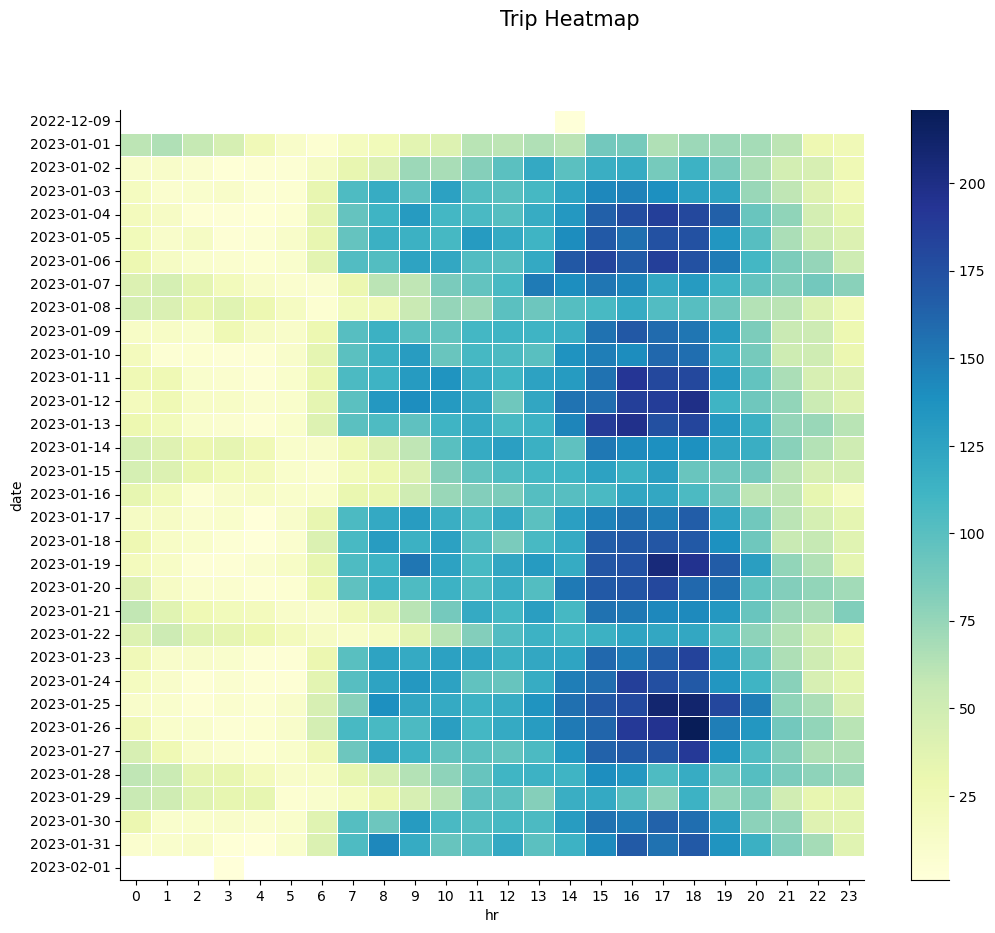

In [94]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=hours,
    fmt='.1%',
    linewidths=0.5,
    cmap="YlGnBu"
)
fig.suptitle('Trip Heatmap', fontsize=15)
sns.despine()
plt.show()

Dapat dilihat dari heatmap bahwa setiap hari weekdays, akan banyak permintaan yang dimulai dari jam 7 pagi dan biasanya akan selesai pada pukul 8 sampai 9 malam. Akan tetapi untuk weekend, biasanya trip akan mulai pada pukul 9 sampai 10 pagi dan akan terus ada permintaan hingga pukul 10 malam.

## Passenger

Analisa terhadap penumpang terbanyak dalam 1 minggu

In [95]:
dates = df.groupby('day', as_index=False)['passenger_count'] \
    .agg({'passenger_count' : 'sum'}) \
    .rename({'passenger_count' : 'total_passengers'}, axis=1)

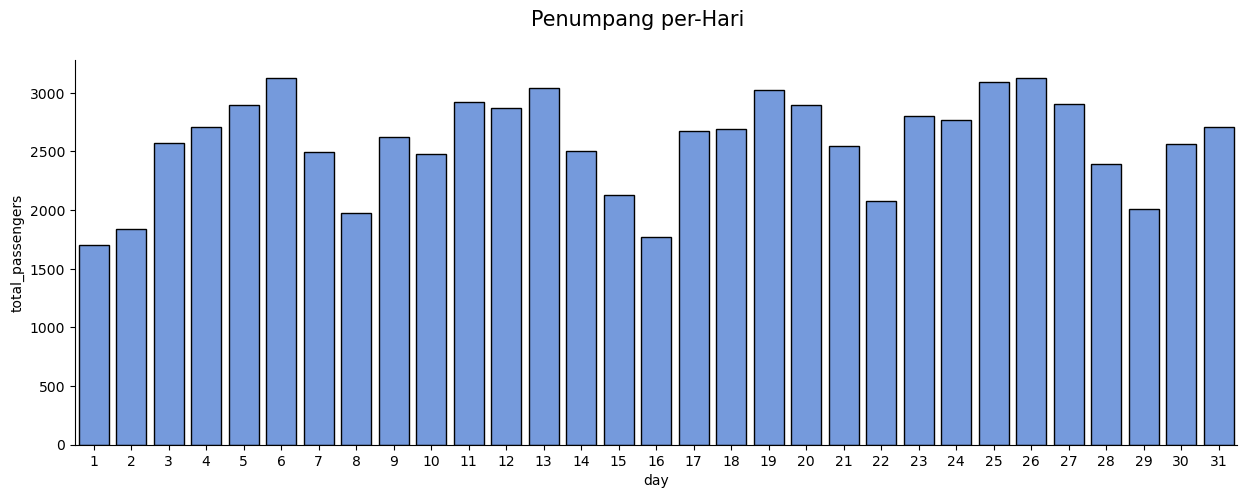

In [96]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=dates,
    x='day',
    y='total_passengers',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Penumpang per-Hari', fontsize=15)
sns.despine()
plt.show()

In [97]:
weekdays_df = df.groupby(['weekday', 'date'], as_index=False)['passenger_count'] \
    .agg({'passenger_count' : 'sum'}) \
    .rename({'passenger_count' : 'total'}, axis=1).groupby('weekday', as_index=False)['total'] \
    .agg({'total' : 'mean'}) \
    .rename({'total' : 'mean'}, axis=1)

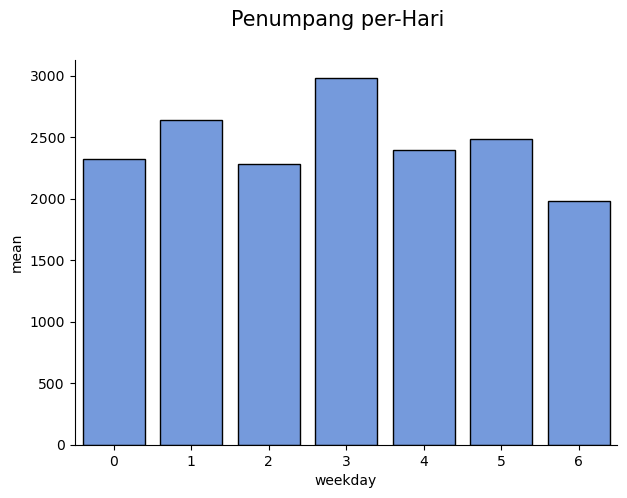

In [98]:
fig = plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=weekdays_df,
    x='weekday',
    y='mean',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Penumpang per-Hari', fontsize=15)
sns.despine()
plt.show()

Dari pola dapat dilihat bahwa ternyata taksi paling sering digunakan pada hari Kamis dimana itu ditengah-tengah weekdays.

## Trip Distance

In [99]:
df.trip_distance.describe()

count    60094.000000
mean         2.716317
std          6.924601
min          0.010000
25%          1.200000
50%          1.890000
75%          3.160000
max       1571.970000
Name: trip_distance, dtype: float64

In [100]:
distances_df = df.groupby('hr', as_index=False)['trip_distance'] \
    .agg({'trip_distance' : 'mean'}) \
    .rename({'trip_distance' : 'avg_dist'}, axis=1)

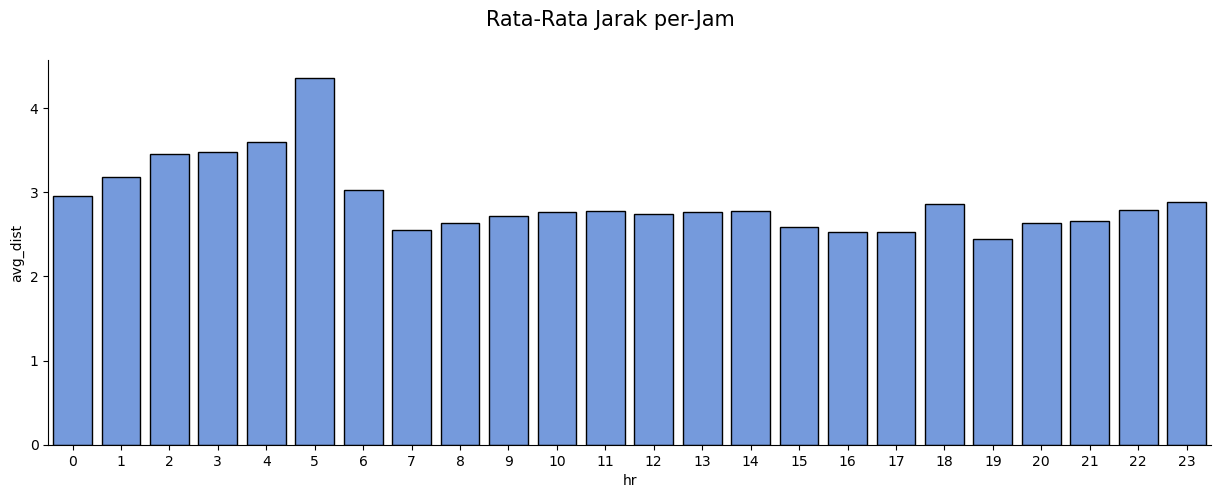

In [111]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=distances_df,
    x='hr',
    y='avg_dist',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Rata-Rata Jarak per-Jam', fontsize=15)
sns.despine()
plt.show()

Dapat dilihat bahwa rata-rata perjalanan paling jauh dilakukan pada jam 5 pagi dan malam hari cenderung lebih jauh daripada siang hari.

## Total Amount

In [102]:
avg_bill_df = df.groupby('hr', as_index=False)['total_amount'] \
    .agg({'total_amount' : 'mean'}) \
    .rename({'total_amount' : 'avg_bill'}, axis=1)

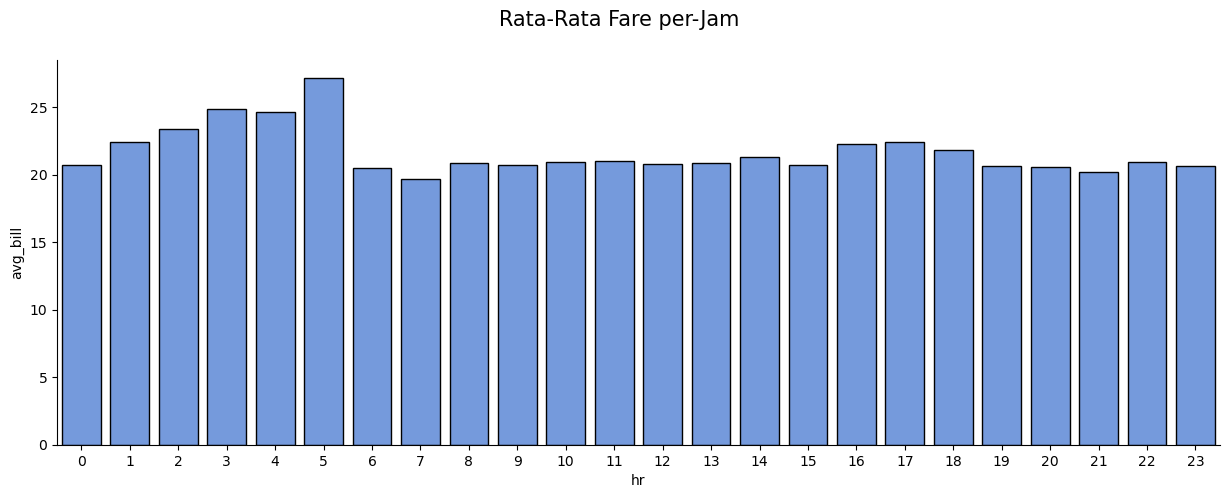

In [112]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=avg_bill_df,
    x='hr',
    y='avg_bill',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Rata-Rata Fare per-Jam', fontsize=15)
sns.despine()
plt.show()

Hal ini dapat dilihat bahwa jarak dan fare berkaitan dimana puncaknya ada pada jam 5 pagi.

## Duration

In [104]:
df.duration.describe()

count    60094.000000
mean        13.349133
std          9.488029
min          0.016667
25%          7.283333
50%         11.150000
75%         16.666667
max        182.533333
Name: duration, dtype: float64

In [105]:
avg_duration_df = df.groupby('hr', as_index=False)['duration'] \
    .agg({'duration' : 'mean'}) \
    .rename({'duration' : 'avg_duration'}, axis=1)

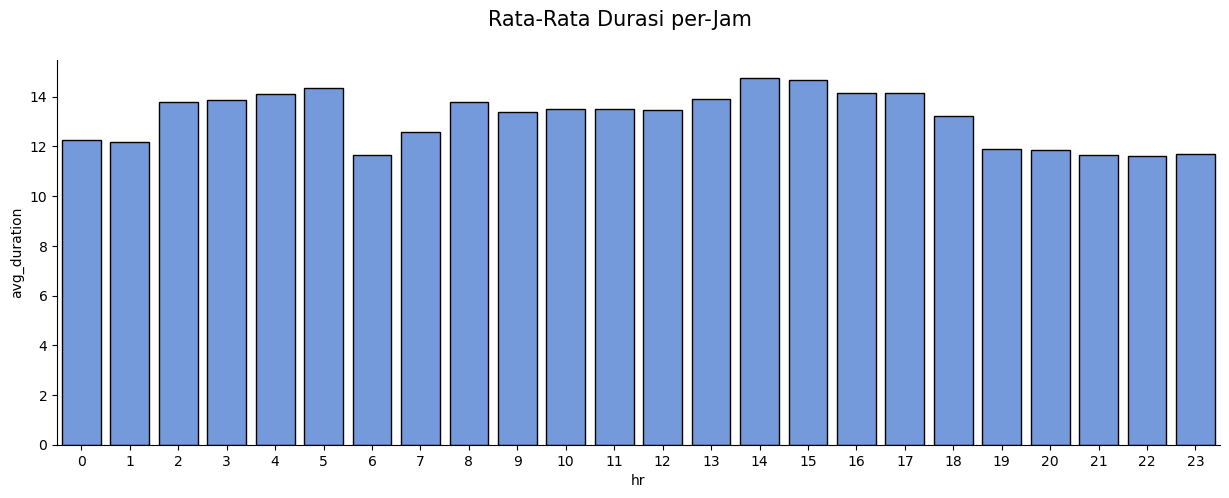

In [113]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=avg_duration_df,
    x='hr',
    y='avg_duration',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Rata-Rata Durasi per-Jam', fontsize=15)
sns.despine()
plt.show()

Bisa dilihat bahwa pesebaran durasi setiap tripnya cenderung sama meskipun ketika malam hari cenderung lebih cepat dibandingkan dengan siang hari

## Area

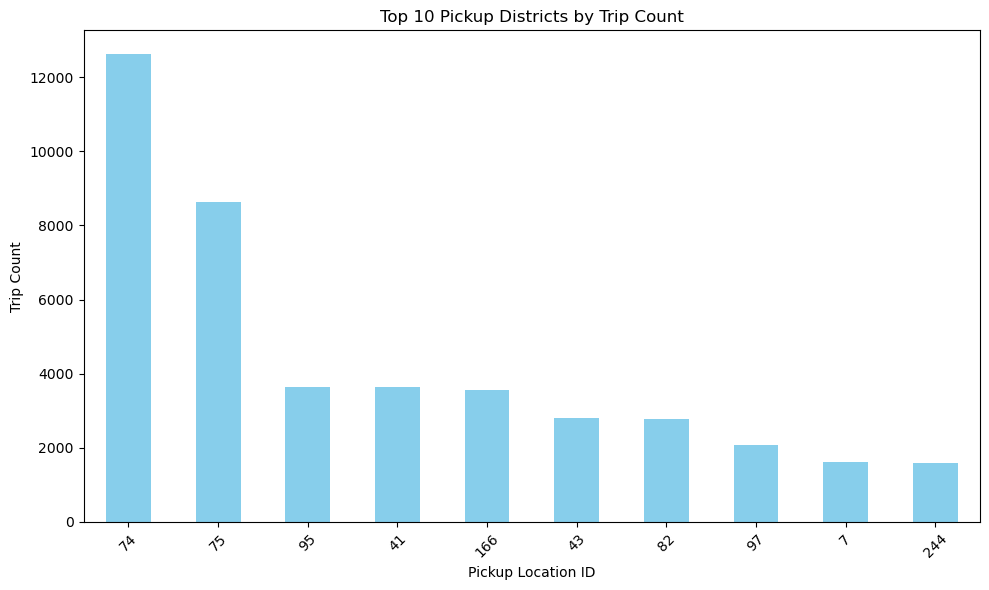

In [107]:
top10_pickup_districts = df['PULocationID'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top10_pickup_districts.plot(kind='bar', color='skyblue')
plt.xlabel('Pickup Location ID')
plt.ylabel('Trip Count')
plt.title('Top 10 Pickup Districts by Trip Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

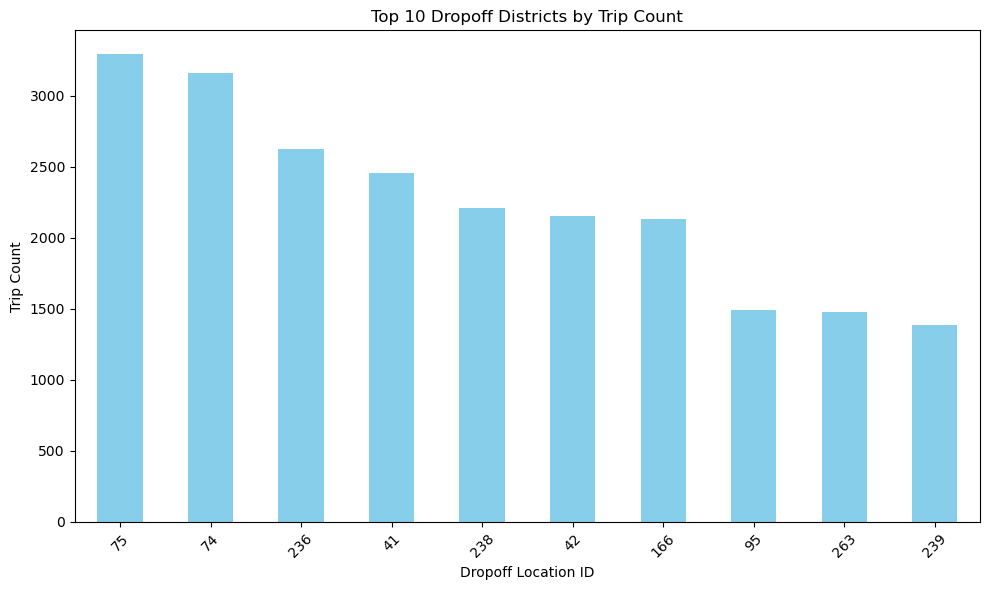

In [108]:
top10_dropoff_districts = df['DOLocationID'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top10_dropoff_districts.plot(kind='bar', color='skyblue')
plt.xlabel('Dropoff Location ID')
plt.ylabel('Trip Count')
plt.title('Top 10 Dropoff Districts by Trip Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Data diatas menunjukkan Top 10 Pick Up dan Drop Off area dari seluruh trip yang ada

## Korelasi Antara Durasi dengan Total_Amount

In [109]:
# Convert the 'duration' column to numeric if it's not already
df['duration'] = pd.to_numeric(df['duration'])

# Calculate the correlation coefficient between fare amount and trip duration
correlation = df['total_amount'].corr(df['duration'])

print("Correlation coefficient between fare amount and trip duration:", correlation)

Correlation coefficient between fare amount and trip duration: 0.7744467349220954


Berdasarkan Korelasi yang diberikan dapat diberikan bahwa total_amount dengan durasi memiliki korelasi yang cukup tinggi dimana mendekati nilai 1. Untuk durasi sendiri dapat dilihat bahwa grafik Durasi memiliki bentuk yang lebih rata dibandingkan dengan Total_Amount. Hal ini dapat diartikan bahwa ada beberapa durasi yang cukup lama sedangkan Total_Amount cenderung lebih rendah. Perusahaan bisa membuat beberapa program untuk meningkatkan ketentuan fare yang include durasi yang cukup lama.

## Melihat Top 10 Total Amount dengan Distance

In [110]:
# Group data by pickup and dropoff locations and calculate average distance for each location pair
avg_distance = df.groupby(['PULocationID', 'DOLocationID'])['trip_distance'].mean().reset_index()

# Group data by pickup and dropoff locations to calculate total trips and sum of total amount for each location pair
total_trips_and_amount = df.groupby(['PULocationID', 'DOLocationID']).agg({'total_amount': 'sum', 'trip_distance': 'mean', 'fare_amount': 'mean', 'payment_type': 'count'}).reset_index()
total_trips_and_amount.rename(columns={'payment_type': 'Total_Trips'}, inplace=True)

# Merge average distance and total trips DataFrames
location_stats = pd.merge(avg_distance, total_trips_and_amount, on=['PULocationID', 'DOLocationID'])

# Rename columns for clarity
location_stats.rename(columns={'PULocationID': 'Pickup_Location', 'DOLocationID': 'Dropoff_Location', 'trip_distance': 'Average_Distance'}, inplace=True)

# Sort by total trips in descending order and select the top 10
top_10_location_stats = location_stats.nlargest(10, 'Total_Trips')

# Display the top 10 location pairs
print(top_10_location_stats)

      Pickup_Location Dropoff_Location  trip_distance_x  total_amount  \
15445              74               75         1.357186      25722.07   
15692              75               74         1.289661      17394.77   
15595              74              236         2.004666      23124.72   
20424              95               95         1.087878      14415.15   
15412              74               41         1.048211      10898.69   
15528              74              166         1.726925      14755.24   
15413              74               42         1.359736       9326.84   
15444              74               74         0.886556       7764.21   
15597              74              238         2.699368      15722.80   
15693              75               75         0.807704       7269.58   

       trip_distance_y  fare_amount  Total_Trips  
15445         1.357186     9.868247         1940  
15692         1.289661     8.584675         1416  
15595         2.004666    12.946132        

Dari sini dapat dilihat bahwa ada beberapa trip yang memiliki total trip yang banyak akan tetapi masih memiliki total amount yang cukup rendah. Hal tersebut bisa ditanggulangi dengan memberikan extra charge terhadap daerah yang memiliki permintaan yang cukup tinggi

# Summary

Dari grafik yang ditampilkan diatas dapat disimpulkan bahwa:
1. Taksi merupakan salah satu angkutan kota yang sangat diminati oleh masyarakat New York dikarena terdapat 68211 trip yang dilakukan.
2. Dari sekian trip yang dilakukan, trip paling sering terjadi pada pukul 4 sampai 6 sore dimana hal itu merupakan jam pulang kerja warga New York.
3. Trip akan banyak peminatnya pada hari kerja dibandingkan dengan weekend. Hal itu dikarenakan pada weekend warga New York jarang menggunakan taksi. Mereka lebih sering menggunakan transportasi pribadi. Dari sini dapat dianalisis bahwa perusahaan bisa memberikan promo yang di bundling dengan tempat-tempat rekreasi atau tempat perbelanjaan sehingga hal itu dapat meningkatkan keinginan masyarakat New York untuk menggunakan taksi.
4. Dari grafik perbandingan antara Trip Distance dengan Total Amount dan Duration. Dapat dilihat bahwa grafik Total Amount dengan grafik Distance memiliki gambar yang mirip. Hal itu dapat diasumsikan bahwa Fare yang diberlakukan pada penumpang sangat bergantung pada jarak perjalanan. Sedangkan duration dengan Total Amount memiliki grafik yang berbeda. Dapat diberikan saran untuk menambah ketentuan untuk menambahkan ketentuan untuk jenis trip yang memiliki durasi lumayan lama karena kemacetan juga pasti akan menghabiskan bensin dan tenaga. 
5. Adanya area dimana masyarakat New York sering naik dan turun dari taksi juga bisa diperhitungkan untuk menambah fare dari area tersebut.  